<a href="https://colab.research.google.com/github/rdambrosioz/aa_2021/blob/main/aa_tarea1_costanzo_dambrosio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1
Efectúe un profundo análisis exploratorio del dataset, incluyendo un estudio de 
correlación entre las variables del mismo. Explique detalladamente los métodos 
utilizados. Para obtener una representación gráfica de la correlación entre variables, se 
recomienda utilizar el método heatmap del paquete Seaborn [3]. Discuta 
detalladamente los resultados obtenidos.


In [ ]:
# Importamos paquetes necesarios
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# wine_df = pd.read_csv('winequality-red.csv')
wine_df = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/winequality-red.csv')

In [ ]:
features = wine_df.columns[0:-1]
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


(fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 dtype: object, count    1599.000000
 mean        5.636023
 std         0.807569
 min         3.000000
 25%         5.000000
 50%         6.000000
 75%         6.000000
 max         8.000000
 Name: quality, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7ff59dd74450>, Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'))

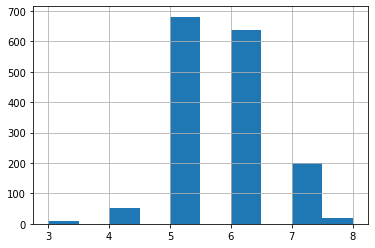

In [ ]:
wine_df.dtypes, wine_df['quality'].describe(),  wine_df['quality'].hist(), features

Se estudia la distribucion de la variable 'quality'. Podemos ver que es discreta, en paricular ordinal.  




<Figure size 1440x1440 with 0 Axes>

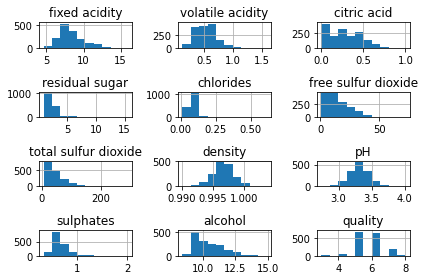

In [ ]:
plt.figure(figsize=(20,20))
wine_df.hist()
plt.tight_layout()
plt.show()

La idea es ver las distintas distribuciones de los features. En particular, la mayoria de ellos pareciera tener distribucion normal. No obstante, 'free sulfure dioxide', 'total sulfure dioxide', 'residual sugar', 'alcohol' y 'citric acid' parecieran tener distribuciones exponenciales.

In [ ]:
correlations = wine_df.corr(method='pearson')
correlations
# ('alcohol', 0.47616632400114156),  --> density
# ('volatile acidity', -0.3905577802640094),  --> citric acid
# ('sulphates', 0.25139707906926206),
# ('citric acid', 0.2263725143180432),
# ('total sulfur dioxide', -0.18510028892653843),
# ('density', -0.1749192277833492),
# Mucha correlacion > 0.5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Aqui se presenta la matriz de correlaciones de los distintos features. Luego se utilizaran los 6 mas correlacionados con la variable 'quality' para realizar un modelo de regresion lineal. Sin embargo, resulta interesante notar que hay dos de ellos (alcohol y volatile acidity) que pueden generar problemas por estar bastante correlacionados (correlacion > 0.5) con otros dos features (density y citric acid respectivamente)

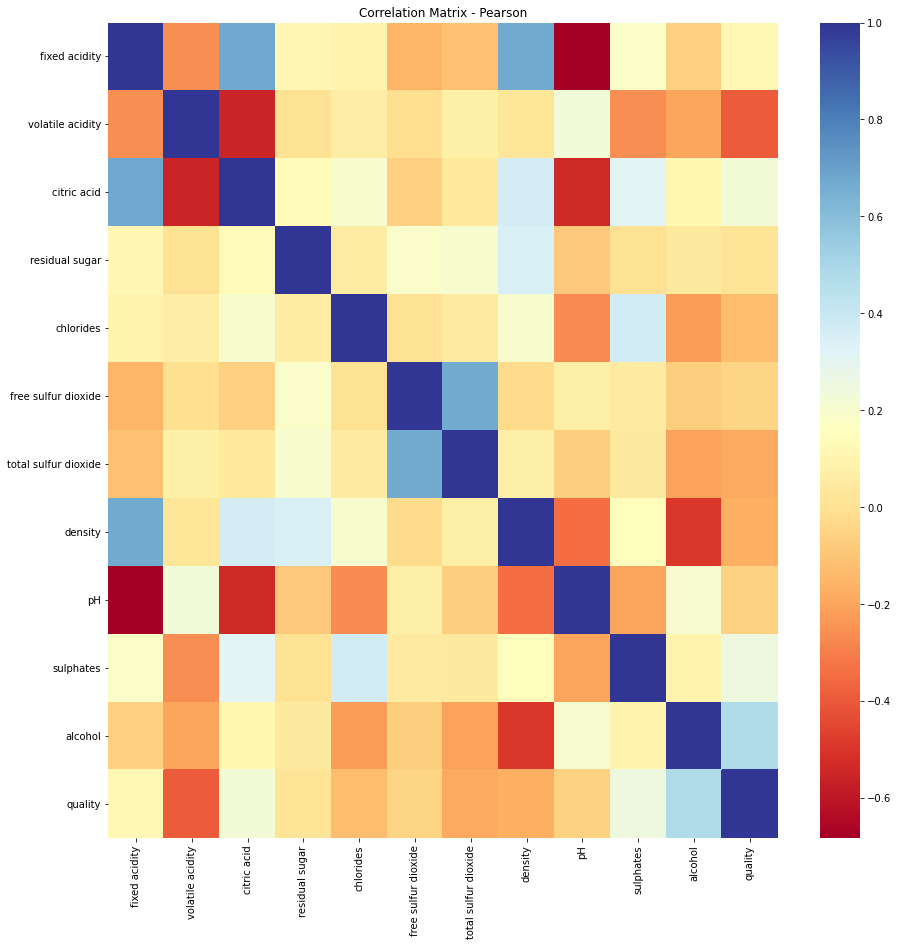

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlations, cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Pearson')
plt.show()

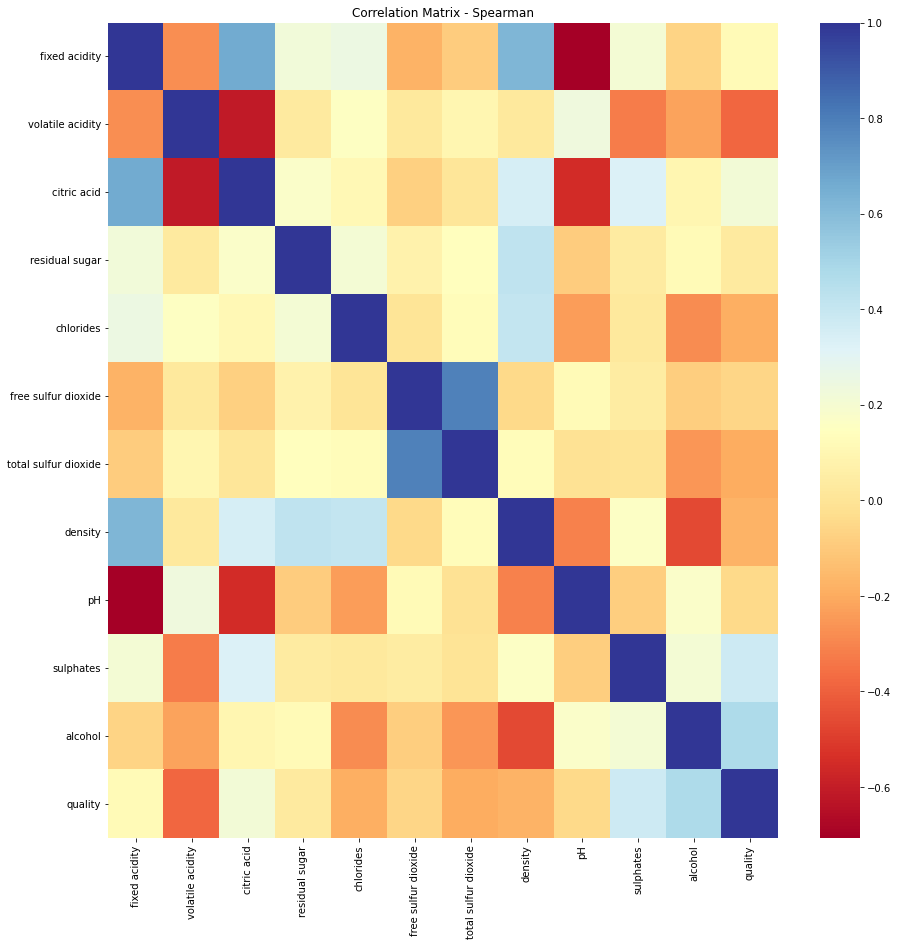

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(wine_df.corr(method='spearman'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()


Aqui se presentan graficamente las matrices de correlacion de los feature. En particular se utilizan dos metricas de correlacion distintas (Pearson y Spearmann)

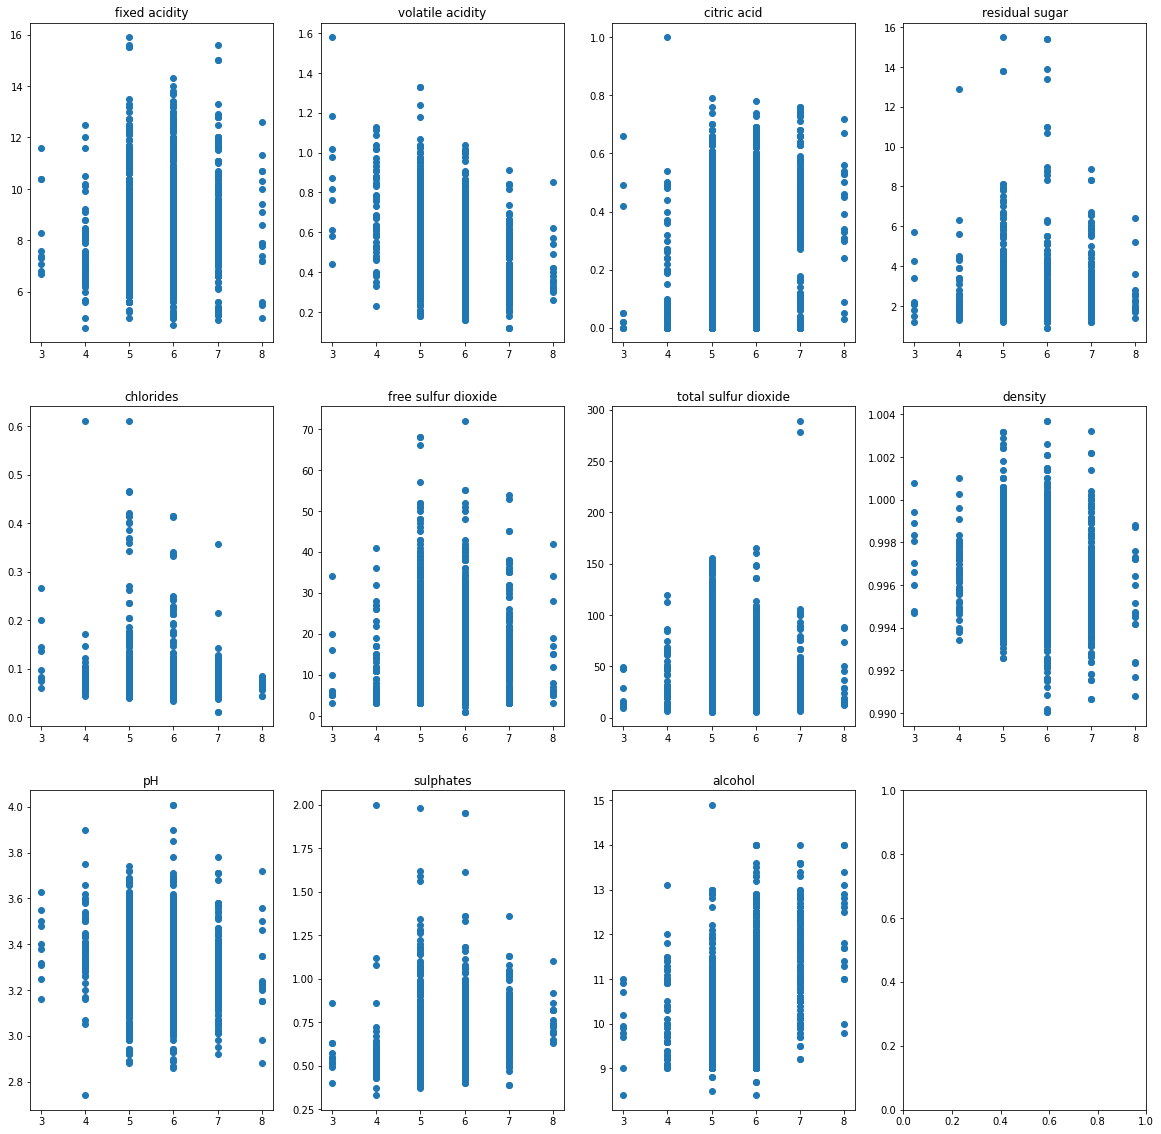

In [ ]:
features = wine_df.columns[0:-1]
label = wine_df['quality']
f, ax = plt.subplots(3,4, figsize=(20,20))
i = 0
for j in range(3):
  for a in ax[j]:
    if i < 11:
      a.scatter(label, wine_df[features[i]])
      a.set_title(features[i])
      i += 1

Aqui se grafican las distintas features enfuncion del label 'quality'. Esto puede ayudar a ver la correlacion entre cada una de las variables y la clase a predecir, asi como tambien entender la dispercion de los valores de cada feature segun el valor de la clase.

In [ ]:
corr_ord = sorted([(i,coef) for i, coef in zip(correlations.index, correlations['quality'])], key= lambda x : abs(x[1]), reverse=True)
corr_ord

[('quality', 1.0),
 ('alcohol', 0.47616632400114156),
 ('volatile acidity', -0.3905577802640094),
 ('sulphates', 0.25139707906926206),
 ('citric acid', 0.2263725143180432),
 ('total sulfur dioxide', -0.18510028892653843),
 ('density', -0.1749192277833492),
 ('chlorides', -0.12890655993005315),
 ('fixed acidity', 0.1240516491132247),
 ('pH', -0.0577313912053823),
 ('free sulfur dioxide', -0.05065605724427643),
 ('residual sugar', 0.013731637340066346)]

Finalmente, se ordenan los features en orden de correlacion con la clase 'quality'. De esta forma, se puede luego elegir las k features mas correlacionadas con la clase a predecir para crear los modelos de regresion lineal.

#Parte 2
Partiendo de los atributos de características del vino utilice el método de regresión 
lineal para predecir la calidad del mismo. Analice los resultados obtenidos. Revise y 
discuta si existen mecanismos para mejorar las métricas que arroja este modelo.

Para una regresion lineal se podrian utilizar todos los features. Sin embargo,esto no solo genera un retrabajo innecesario (ya que puede que ciertas variables no aporten a la prediccion), sino que ademas podrian generar peores modelos.

Para la seleccion de las variables tomamos dos caminos distintos. En primer luga, y como adelantamos antes, elegimos las k variables mas correlacionadas con la clase. En segundo lugar, utilizamos el metod ChiSelector de sklearn, que elige las k variables que generan mejores resultados.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

sample = 0.8
n_features = 5

def get_X_Y(sample, n_features, df, corr_ord):
  df_train, df_test = train_test_split(df, test_size=1-sample)

  X_train = df_train[[i[0] for i in corr_ord[1:n_features]]]
  X_test = df_test[[i[0] for i in corr_ord[1:n_features]]]
  Y_train = df_train['quality']
  Y_test = df_test['quality']

  return X_train, X_test, Y_train, Y_test


Esta funcion devuelve los vectoers X e Y dado un coeficiente de sample y un numero de features a utilizar. En particular se elegien las n_features mas correlacionadas

In [ ]:
def my_linear_model(X_train, X_test, Y_train, Y_test):
  regr = linear_model.LinearRegression()

  regr.fit(X_train, Y_train)

  Y_pred = regr.predict(X_test)

  mse = mean_squared_error(Y_test, Y_pred)
  r2 = r2_score(Y_test, Y_pred)
  mae =  mean_absolute_error(Y_test, Y_pred)

  # print('MSE: %.2f' % mse)
  # print('R2: %.2f' % r2)
  # print('MAE: %.2f' % mae)
  
  return Y_pred, mse, r2, mae

Aqui se ejecuta el modelo lieneal a partir de los vectores X e Y de entrenamiento y validacion. Se devuelven las metricas del modelo

In [ ]:
all_linear_models = []
sample = 0.8
for i in range(2,len(corr_ord)):
  X_train, X_test, Y_train, Y_test = get_X_Y(sample, i, wine_df, corr_ord)
  Y_pred, mse, r2, mae = my_linear_model(X_train, X_test, Y_train, Y_test)
  all_linear_models += [(i,mse,r2,mae)]

pd.DataFrame(all_linear_models, columns=['n_feature_', 'mse', 'r2', 'mae'])

,n_feature_,mse,r2,mae
0,2,0.449414,0.287605,0.555195
1,3,0.439222,0.292825,0.534957
2,4,0.390880,0.367226,0.491275
3,5,0.406290,0.414019,0.506480
4,6,0.414599,0.363341,0.502770
5,7,0.361786,0.384757,0.468783
6,8,0.438151,0.340496,0.504398
7,9,0.425001,0.351366,0.506198
8,10,0.440488,0.301234,0.507604
9,11,0.420171,0.284387,0.509256


Este es el primer approach. Se prueba iterativamente la cantidad de variables a utilizar. En funcoin de las metricas, definimos uqe b_feature = 6 es una cantidad de variables optima.

In [1]:
X_train, X_test, Y_train, Y_test = get_X_Y(sample, 6, wine_df, corr_ord)
Y_pred, mse, r2, mae = my_linear_model(X_train, X_test, Y_train, Y_test)
plt.scatter([i for i in range(len(Y_test))], Y_test,c='r', label='Real')
plt.scatter([i for i in range(len(Y_test))], Y_pred,c='b', alpha=0.5, label='Predicted' )

NameError: ignored

Ademas de obtener las metricas para el modelo, resulta interesante plotear las predicciones y los valores reales para cada instancia. 
Aqui podemos observar que las predicciones no son necesariamente un valor discreto, dado que estamos realizando una regresion lineal.

MSE: 0.43
R2: 0.24
MAE: 0.40


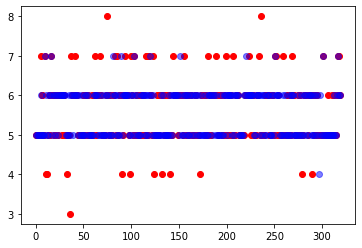

In [ ]:
import math
Y_pred_adapted = [math.floor(i) if abs(math.floor(i)-i) <= 0.5 else math.ceil(i) for i in Y_pred]
print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred_adapted))
print('R2: %.2f' % r2_score(Y_test, Y_pred_adapted))
print('MAE: %.2f' % mean_absolute_error(Y_test, Y_pred_adapted))

plt.scatter([i for i in range(len(Y_test))], Y_test,c='r')
plt.scatter([i for i in range(len(Y_test))], Y_pred_adapted,c='b', alpha=0.5)

Visto lo anterior, resulta interesante obtener las metricas del modelo luego de colapsar las predicciones continuas a los posibles valores discretos de la variable 'quality'. Vemos que en este caso las metricas empeoran

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

X_train, X_test, Y_train, Y_test = get_X_Y(sample, len(corr_ord), wine_df, corr_ord)

pipe = Pipeline([('fselector', SelectKBest(chi2, k=6)), ('l_reg', linear_model.LinearRegression())])
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae =  mean_absolute_error(Y_test, Y_pred)

print('MSE: %.2f' % mse)
print('R2: %.2f' % r2)
print('MAE: %.2f' % mae)


MSE: 0.47
R2: 0.39
MAE: 0.53


En el caso del ChiSelector, utilizamos tambien las mejores 6 features (para ser justos con el modelo de features elegidos segun su correlacion).

Podemos ver como logramos un modelo similar, con metricas un poco por debajo

# Parte 3
Utilizando los métodos de clasificación vistos en el curso, se pretende encontrar el mejor modelo que permita predecir, a partir de las características disponibles en el dataset [1], la calidad del vino. La variable de calidad debe de convertirse a una clase de 2 valores: bueno y malo,. Será parte del problema definir el umbral de corte para determinar esta clase, partiendo de las categorías definidas en [1].
Utilizando los métodos y métricas vistas en el curso, compare los resultados obtenidos. Para todos los métodos utilizados, estudie la relevancia de cada uno de los atributos o features.
Para cada uno de los modelos utilizados, detalle los hiperparámetros aplicados.



(count    1599.000000
 mean        5.636023
 std         0.807569
 min         3.000000
 25%         5.000000
 50%         6.000000
 75%         6.000000
 max         8.000000
 Name: quality, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff59526c6d0>)

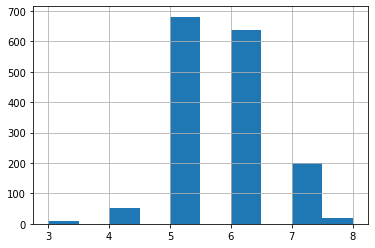

In [ ]:
wine_df['quality'].describe(),  wine_df['quality'].hist()

In [ ]:
def set_label(df, umbral, label_name, rank_name):

  df[label_name] = [1 if q>=umbral else 0 for q in df[rank_name]]
  return df

In [ ]:
wine_df = set_label(wine_df, 6, 'q_label', 'quality')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,q_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

def get_scores(Y_pred, probs, Y_test, plot=True):

  # Calcular TP, TN, FP, FN
  # Armar matriz de cofusion
  # Recall, Precision, Accuracy, F1
  # AUC
  # probas = model.predict_proba(X_test)
  fpr, tpr, thresholds = roc_curve(Y_test,probs[:,1])
  if plot:
    plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
    plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    print("AUC: {}" .format(auc(fpr, tpr)))

  accuracy = accuracy_score(Y_test, Y_pred)
    
  
  mat = confusion_matrix(Y_test, Y_pred)
  if plot:
    print (classification_report(Y_test,Y_pred))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Clase de test')
    plt.ylabel('Clase de la predicción');

  return accuracy

In [ ]:
sample = 0.8
df_train, df_test = train_test_split(wine_df, train_size=sample)

X_train = df_train[features]
X_test = df_test[features]
Y_train = df_train['q_label']
Y_test = df_test['q_label']

In [ ]:
from sklearn.naive_bayes import GaussianNB
all_gdb = []
for f in range(1,len(features)+1):
  model = GaussianNB()

  pipe = Pipeline([('fselector', SelectKBest(chi2, k=f)), ('gnb', model)])
  pipe.fit(X_train, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  all_gdb += [(f,get_scores(Y_pred, new_Y_pewd, Y_test, plot=False))]

all_gdb = sorted(all_gdb, key = lambda x : x[1], reverse=True)
all_gdb = pd.DataFrame(all_gdb, columns=['n_feature', 'acc'])
all_gdb

,n_feature,acc
0,7,0.771875
1,5,0.765625
2,6,0.765625
3,9,0.753125
4,4,0.746875
5,8,0.746875
6,10,0.746875
7,11,0.746875
8,2,0.709375
9,3,0.700000


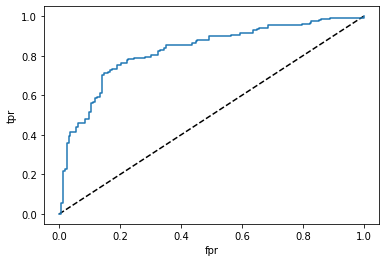

AUC: 0.8274393341409089
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       163
           1       0.77      0.76      0.77       157

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



0.771875

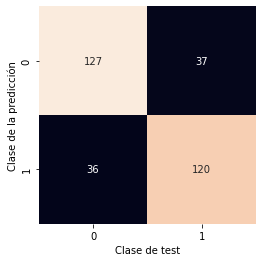

In [ ]:
model = GaussianNB()
# model.fit(X_train, Y_train);

pipe = Pipeline([('fselector', SelectKBest(chi2, k=all_gdb['n_feature'][0])), ('gnb', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)

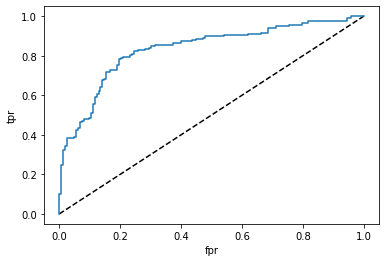

AUC: 0.8333007698018835
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       163
           1       0.75      0.83      0.79       157

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



0.778125

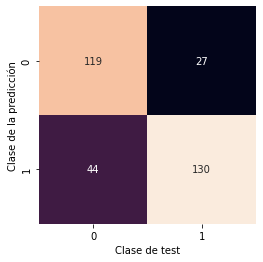

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='lbfgs')
# model.fit(X_train, Y_train);

pipe = Pipeline([('fselector', SelectKBest(chi2, k=10)), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)

In [ ]:
all_lr = []
for f in range(1,len(features)+1):
  model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
  # model.fit(X_train, Y_train);

  pipe = Pipeline([('fselector', SelectKBest(chi2, k=f)), ('lr', model)])
  pipe.fit(X_train, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  all_lr += [(f,get_scores(Y_pred, new_Y_pewd, Y_test, plot=False))]

all_lr = sorted(all_lr, key = lambda x : x[1], reverse=True)
all_lr = pd.DataFrame(all_lr, columns=['n_feature', 'acc'])
all_lr

,n_feature,acc
0,8,0.796875
1,7,0.793750
2,9,0.793750
3,10,0.793750
4,11,0.793750
5,4,0.781250
6,5,0.781250
7,6,0.781250
8,3,0.721875
9,2,0.706250


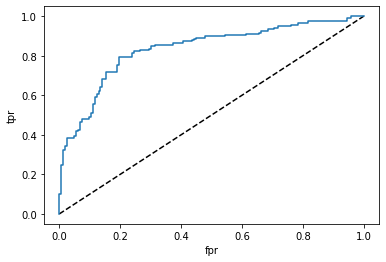

AUC: 0.8334961509905825
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       163
           1       0.79      0.79      0.79       157

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



0.796875

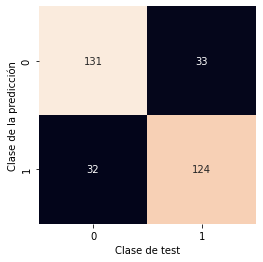

In [ ]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
# model.fit(X_train, Y_train);

pipe = Pipeline([('fselector', SelectKBest(chi2, k=all_lr['n_feature'][0])), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)

### IMPORTANCIA DE LOS FEATURES

In [ ]:
model = GaussianNB()
pipe = Pipeline([('gnb', model)])
# model.fit(X_train, Y_train);
f_importance = []
for i in range(len(features)):
  n_f = list(X_train.columns)
  n_f.pop(i)
  X_train_n = X_train[n_f]
  X_test_n = X_test[n_f]
  
  pipe.fit(X_train_n, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test_n)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  accuracy = accuracy_score(Y_test, Y_pred)

  f_importance += [(features[i], accuracy)]

pd.DataFrame(sorted(f_importance, key=lambda x:x[1], reverse=True), columns=['feature_extracted', 'acc'])

,feature_extracted,acc
0,total sulfur dioxide,0.778125
1,chlorides,0.775000
2,fixed acidity,0.753125
3,free sulfur dioxide,0.753125
4,density,0.753125
5,residual sugar,0.750000
6,sulphates,0.750000
7,pH,0.746875
8,citric acid,0.743750
9,volatile acidity,0.721875


In [ ]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced')
pipe = Pipeline([('lr', model)])
# model.fit(X_train, Y_train);
f_importance = []
for i in range(len(features)):
  n_f = list(X_train.columns)
  n_f.pop(i)
  X_train_n = X_train[n_f]
  X_test_n = X_test[n_f]
  
  pipe.fit(X_train_n, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test_n)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  accuracy = accuracy_score(Y_test, Y_pred)

  f_importance += [(features[i], accuracy)]

pd.DataFrame(sorted(f_importance, key=lambda x:x[1], reverse=True), columns=['feature_extracted', 'acc'])

,feature_extracted,acc
0,residual sugar,0.793750
1,density,0.793750
2,pH,0.793750
3,citric acid,0.787500
4,chlorides,0.787500
5,fixed acidity,0.784375
6,free sulfur dioxide,0.784375
7,total sulfur dioxide,0.784375
8,sulphates,0.781250
9,volatile acidity,0.728125


# Parte 4
Explique las bases teóricas del algoritmo k-NN (k-nearest neighbors) y aplíquelo al dataset. Compare con los resultados obtenidos en la parte 3.



# Bases teóricas
El algoritmo de k-nearest neighbors (KNN) es un algoritmo de aprendizaje automático supervisado simple que se puede utilizar para resolver problemas de clasificación y regresión. Es fácil de implementar y comprender, pero tiene el principal inconveniente de que se ralentiza significativamente a medida que aumenta el tamaño de los datos en uso. 

KNN funciona encontrando las distancias entre una consulta y todas las instancias en los datos de entrenamient, seleccionando las K instancias más cercanos a la consulta. Luego vota por la etiqueta más frecuente (en el caso de clasificación) o promedia las etiquetas (en el caso de la regresión). 
En nuestro caso, ademas, se propone seleccionar los features de las instancias que aporten mayor cantidad de informacion para la prediccion de la clase 'quality'.

Por ultimo, determinar el valor K puede ser una tarea comleja. A mayor K, se esperaria poder tener mejores resultados. Pero un K demasiado grande, puede ser contraproducente para el modelo, ya que se considerarian como similares demasiadas instancias.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
all_results = []
for f in range(1,len(features)):
  for K in range(5,120,5):  
    model = KNeighborsClassifier (n_neighbors=K)

    pipe = Pipeline([('fselector', SelectKBest(chi2, k=f)), ('knn', model)])
    pipe.fit(X_train, Y_train)
    new_Y_pewd = pipe.predict_proba(X_test)

    umbral_prob = 0.5
    Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
    all_results += [(K,get_scores(Y_pred, new_Y_pewd, Y_test, False),f)]

pd.DataFrame(sorted(all_results, key = lambda x : x[1], reverse=True), columns=['K', 'acc', 'n_features'])

,K,acc,n_features
0,5,0.709375,2
1,15,0.678125,2
2,10,0.675000,2
3,25,0.659375,2
4,30,0.653125,2
...,...,...,...
225,20,0.556250,1
226,45,0.556250,1
227,50,0.556250,1
228,55,0.556250,1


In [ ]:
all_results = []
for f in range(1,len(features)):
  for K in range(5,120,5):  
    model = KNeighborsClassifier (n_neighbors=K, weights='distance') #Se probaron todos los algorithms y ninguno cambio los resultados

    pipe = Pipeline([('fselector', SelectKBest(chi2, k=f)), ('knn', model)])
    pipe.fit(X_train, Y_train)
    new_Y_pewd = pipe.predict_proba(X_test)

    umbral_prob = 0.5
    Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
    all_results += [(K,get_scores(Y_pred, new_Y_pewd, Y_test, False),f)]

all_results = sorted(all_results, key = lambda x : x[1], reverse=True)
all_results = pd.DataFrame(all_results, columns=['K', 'acc', 'n_features'])
all_results

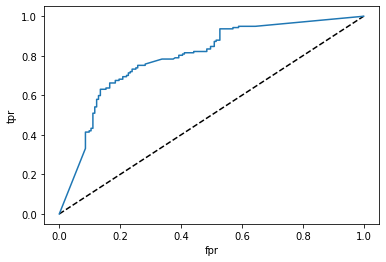

AUC: 0.7945566800828416
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       163
           1       0.69      0.78      0.73       157

    accuracy                           0.72       320
   macro avg       0.73      0.72      0.72       320
weighted avg       0.73      0.72      0.72       320



0.721875

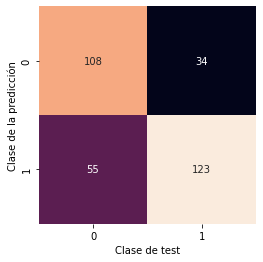

In [ ]:
model = KNeighborsClassifier (n_neighbors=all_results['K'][0], weights='distance')

pipe = Pipeline([('fselector', SelectKBest(chi2, k=all_results['n_features'][0])), ('knn', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)